# August ??, 2021

**Motivation**: Engine on again <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [15]:
key = 'sub-SLC05_ses-1_run-1'
task = 'rest'
mode = 'bold'

metric = 'pearson'
match_metric = 'cosine'

mice = Mice(Config(128))
mice.combine_dfs(task, full=True)

## Net

In [16]:
net = Network(
    mice=mice,
    key=key,
    task=task,
    mode=mode,
    metric=metric,
).load_network()

In [17]:
_ = net.fig_within_hemis(save_dir=tmp_dir, figsize=(26, 23))

In [5]:
region_overlap = mice.parcel.get_region_overlap()

  0%|          | 0/128 [00:00<?, ?it/s]

In [6]:
region_overlap

{
    1: {'MO': 64.0, 'MOs': 64.0, 'FRP': 31.0},
    2: {'PL': 48.0, 'MO': 35.0, 'MOs': 35.0},
    3: {'ORB': 95.0},
    4: {'AI': 66.0, 'ORB': 23.0},
    5: {'MO': 100.0, 'MOs': 100.0},
    6: {'MO': 100.0, 'MOs': 64.0, 'MOp': 36.0},
    7: {'ORB': 73.0, 'ILA': 27.0},
    8: {'ORB': 92.0},
    9: {'AI': 95.0},
    10: {'MO': 100.0, 'MOp': 60.0, 'MOs': 40.0},
    11: {'MO': 69.0, 'MOs': 69.0, 'ACA': 31.0},
    12: {'MO': 88.0, 'MOp': 88.0},
    13: {'MO': 87.0, 'MOs': 87.0},
    14: {'PL': 82.0},
    15: {'MO': 52.0, 'MOp': 52.0, 'SS': 48.0, 'SSp': 48.0, 'SSp-m': 48.0},
    16: {'AI': 98.0},
    17: {'MO': 100.0, 'MOs': 58.0, 'MOp': 42.0},
    18: {'MO': 100.0, 'MOp': 100.0},
    19: {'SS': 85.0, 'SSp': 68.0, 'SSp-m': 68.0},
    20: {'MO': 94.0, 'MOs': 94.0},
    21: {
        'SS': 66.0,
        'SSp': 66.0,
        'SSp-ul': 39.0,
        'MO': 34.0,
        'MOp': 34.0,
        'SSp-m': 27.0
    },
    22: {'ACA': 100.0},
    23: {'GU': 50.0, 'AI': 50.0},
    24: {'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0},
    25: {'MO': 100.0, 'MOp': 90.0},
    26: {'MO': 77.0, 'MOp': 77.0, 'SS': 23.0, 'SSp': 23.0},
    27: {'SS': 100.0, 'SSs': 100.0},
    28: {'SS': 100.0, 'SSp': 100.0, 'SSp-n': 94.0},
    29: {'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 74.0},
    30: {'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 79.0, 'SSp-un': 21.0},
    31: {'ACA': 92.0},
    32: {'MO': 100.0, 'MOp': 55.0, 'MOs': 45.0},
    33: {'SS': 100.0, 'SSp': 51.0, 'SSs': 49.0, 'SSp-n': 43.0},
    34: {'AI': 52.0, 'VISC': 35.0},
    35: {'SS': 90.0, 'SSp': 90.0, 'SSp-ll': 85.0},
    36: {'SS': 83.0, 'SSs': 83.0},
    37: {'RSP': 77.0},
    38: {'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 87.0},
    39: {'SS': 69.0, 'SSp': 69.0, 'SSp-tr': 60.0},
    40: {
        'SS': 100.0,
        'SSp': 100.0,
        'SSp-ul': 34.0,
        'SSp-tr': 22.0,
        'SSp-un': 21.0
    },
    41: {'SS': 100.0, 'SSp': 87.0, 'SSp-bfd': 83.0},
    42: {'SS': 100.0, 'SSs': 100.0},
    43: {'VISC': 45.0, 'AI': 41.0},
    44: {'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0},
    45: {'RSP': 100.0},
    46: {'AUD': 68.0, 'SS': 32.0, 'SSs': 32.0},
    47: {'AUD': 56.0, 'TEa': 32.0},
    48: {'PTLp': 83.0},
    49: {'SS': 61.0, 'SSs': 49.0, 'AUD': 36.0},
    50: {'VIS': 73.0, 'RSP': 24.0},
    51: {'ECT': 61.0, 'TEa': 27.0},
    52: {'PTLp': 56.0, 'VIS': 42.0},
    53: {'RSP': 100.0},
    54: {'AUD': 100.0},
    55: {'RSP': 100.0},
    56: {'VIS': 100.0},
    57: {'TEa': 54.0, 'ECT': 33.0},
    58: {'VIS': 59.0, 'TEa': 22.0},
    59: {'RSP': 73.0, 'VIS': 27.0},
    60: {'VIS': 100.0},
    61: {'TEa': 58.0, 'VIS': 40.0},
    62: {'VIS': 76.0, 'RSP': 24.0},
    63: {'VIS': 100.0},
    64: {'VIS': 92.0},
    65: {'MO': 53.0, 'MOs': 53.0, 'FRP': 37.0},
    66: {'PL': 59.0, 'MO': 26.0, 'MOs': 26.0},
    67: {'ORB': 94.0},
    68: {'AI': 57.0, 'ORB': 35.0},
    69: {'MO': 100.0, 'MOs': 100.0},
    70: {'MO': 100.0, 'MOs': 74.0, 'MOp': 26.0},
    71: {'ORB': 68.0, 'ILA': 32.0},
    72: {'ORB': 97.0},
    73: {'AI': 90.0},
    74: {'MO': 100.0, 'MOs': 50.0, 'MOp': 50.0},
    75: {'MO': 59.0, 'MOs': 59.0, 'ACA': 41.0},
    76: {'MO': 83.0, 'MOp': 83.0},
    77: {'MO': 79.0, 'MOs': 79.0},
    78: {'PL': 81.0},
    79: {'MO': 62.0, 'MOp': 62.0, 'SS': 38.0, 'SSp': 38.0, 'SSp-m': 38.0},
    80: {'AI': 99.0},
    81: {'MO': 100.0, 'MOs': 69.0, 'MOp': 31.0},
    82: {'MO': 100.0, 'MOp': 100.0},
    83: {'SS': 84.0, 'SSp': 71.0, 'SSp-m': 71.0},
    84: {'MO': 89.0, 'MOs': 89.0},
    85: {'SS': 59.0, 'SSp': 59.0, 'SSp-ul': 42.0, 'MO': 41.0, 'MOp': 41.0},
    86: {'ACA': 100.0},
    87: {'AI': 54.0, 'GU': 46.0},
    88: {'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0},
    89: {'MO': 100.0, 'MOp': 81.0},
    90: {'MO': 84.0, 'MOp': 84.0},
    91: {'SS': 100.0, 'SSs': 100.0},
    92: {'SS': 100.0, 'SSp': 100.0, 'SSp-n': 89.0},
    93: {'SS': 97.0, 'SSp': 97.0, 'SSp-ul': 82.0},
    94: {'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 88.0},
    95: {'ACA': 98.0},
    96: {'MO': 100.0, 'MOs': 58.0, 'MOp': 42.0},
    97: {'SS': 100.0, 'SSp': 59.0

## SVINET

current expt: 'p-1'

[PROGRESS] loading 'k5-cosine-linksampling-(2021_07_21)' from
'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/b
old_spearman_sub-SLC_n128/p-1'

  0%|          | 0/100 [00:00<?, ?it/s]

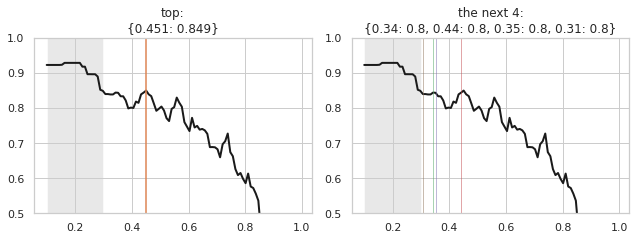

[PROGRESS] process results: done

[PROGRESS] 34870 results loaded

00 - 00:00:26  (dd - hh:mm:ss)

In [376]:
k = 5
p = -1

start = time()
svinet = SVINET(
    mice=mice,
    num_k=k,
    perc=p,
    key=key,
    mode=mode,
    metric='spearman', # metric,
    match_metric=match_metric,
    verbose=True,
).load_results(full_process=True)
convert_time(time()-start)

## Net plots

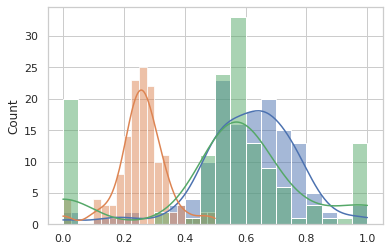

In [377]:
p = 20
sns.histplot(list(nx.clustering(svinet.graphs[p]).values()), color='C0', bins=20, kde=True)
sns.histplot(list(nx.clustering(svinet.graphs_cfg[p]).values()), color='C1', bins=20, kde=True)
sns.histplot(list(nx.clustering(svinet.graphs_cfg_cl[p]).values()), color='C2', bins=20, kde=True)
plt.show()

In [378]:
df = []
for p in svinet.percentiles:
    df.append(svinet.centralities[p])
df = pd.concat(df)
len(df.measure.unique())

15

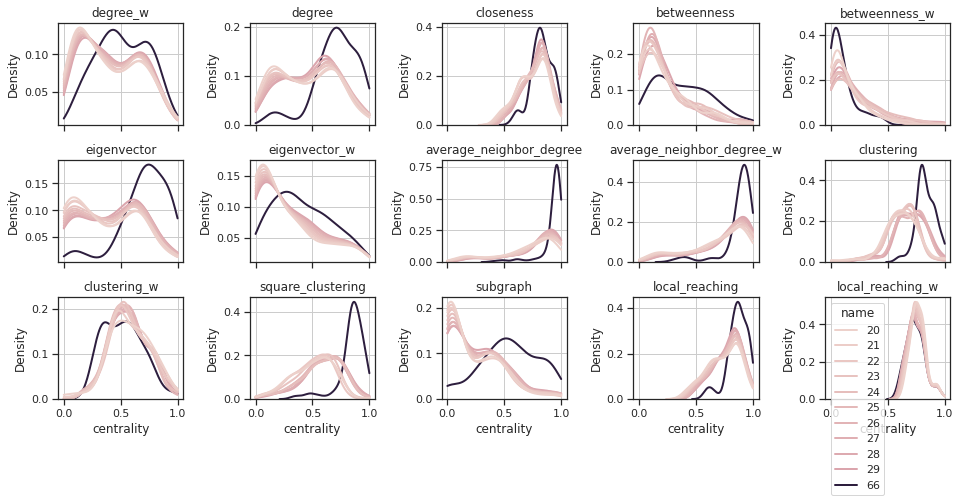

In [379]:
nrows = 3
ncols = int(np.ceil(len(df.measure.unique()) / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 7), 'ticks', 'all')

for i, (ax, measure) in enumerate(zip(axes.ravel(), df.measure.unique())):
    sns.kdeplot(
        data=df.loc[df.measure == measure],
        x='centrality',
        hue='name',
        clip=(0, 1),
        legend=True if (i + 1) % len(df.measure.unique()) == 0 else False,
        lw=2,
        ax=ax,
    )
    ax.set_title(measure)
    ax.grid()

In [380]:
svinet.scores()

+---------------+-------+-------+
| type          |  over | score |
+---------------+-------+-------+
| pi symmetry   |  oc1  |  0.97 |
| pi symmetry   |  oc2  |  0.96 |
| pi symmetry   |  oc3  |  0.97 |
| pi symmetry   |  oc4  |  0.87 |
| pi symmetry   |  oc5  |  0.98 |
| pi symmetry   |  avg  |  0.95 |
| ---           |  ---  |  ---  |
| entropy score | nodes |  0.92 |
| ---           |  ---  |  ---  |
| cosine        | nodes |  0.82 |
| correlation   | nodes |  0.73 |
| braycurtis    | nodes |  0.67 |
| jensenshannon | nodes |  0.69 |
+---------------+-------+-------+

In [381]:
svinet.path.split('/')

[
    '',
    'home',
    'hadi',
    'Documents',
    'Ca-fMRI',
    'processed',
    'norm-global_parcel-spatial-sym_n-128',
    'results',
    'SVINET',
    'bold_spearman_sub-SLC_n128',
    'p-1',
    'k5-cosine-linksampling-(2021_07_21)'
]

In [382]:
list(svinet.get_result_dict())[:5]

[
    'n138-k5-mmsb-seed1-linksampling-p26',
    'n138-k5-mmsb-seed2-linksampling-p26',
    'n138-k5-mmsb-seed3-linksampling-p26',
    'n138-k5-mmsb-seed4-linksampling-p26',
    'n138-k5-mmsb-seed5-linksampling-p26'
]

In [383]:
pi_all = collections.defaultdict(list)
for name, run in svinet.get_result_dict().items():
    p = int(name.split('-')[-1][1:])
    pi_all[p].append(np.expand_dims(run['pi'], axis=0))

pi_various = {}
for k, v in pi_all.items():
    pi_various[k] = np.concatenate(v).mean(0)

In [384]:
list(pi_various)

[26, 25, 24, 23, 22, 21, 20]

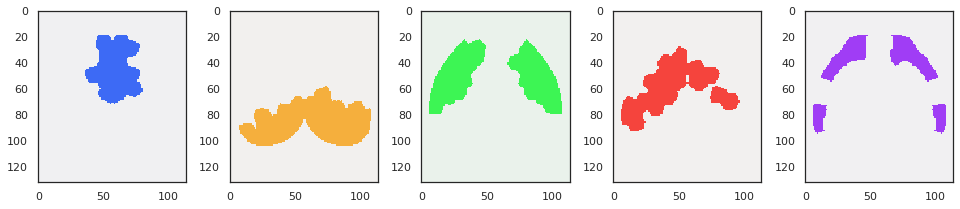

In [385]:
masks = svinet.masks_from_pi(pi_various[20], disjoint=True, cortex_only=True)

fig, axes = create_figure(1, svinet.num_k, (13.5, 3.5))
for idx in range(1, svinet.num_k + 1):
    x = project_vol_2d(masks[idx], mice.allen['dims_flat'], mode='max_proj')
    axes[idx-1].imshow(x, cmap=svinet.cmaps[idx])

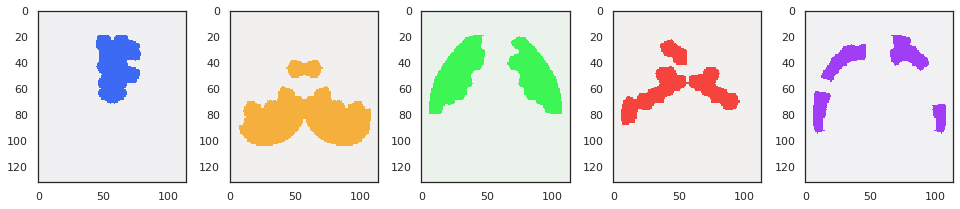

In [386]:
masks = svinet.masks_from_pi(pi_various[26], disjoint=True, cortex_only=True)

fig, axes = create_figure(1, svinet.num_k, (13.5, 3.5))
for idx in range(1, svinet.num_k + 1):
    x = project_vol_2d(masks[idx], mice.allen['dims_flat'], mode='max_proj')
    axes[idx-1].imshow(x, cmap=svinet.cmaps[idx])
    

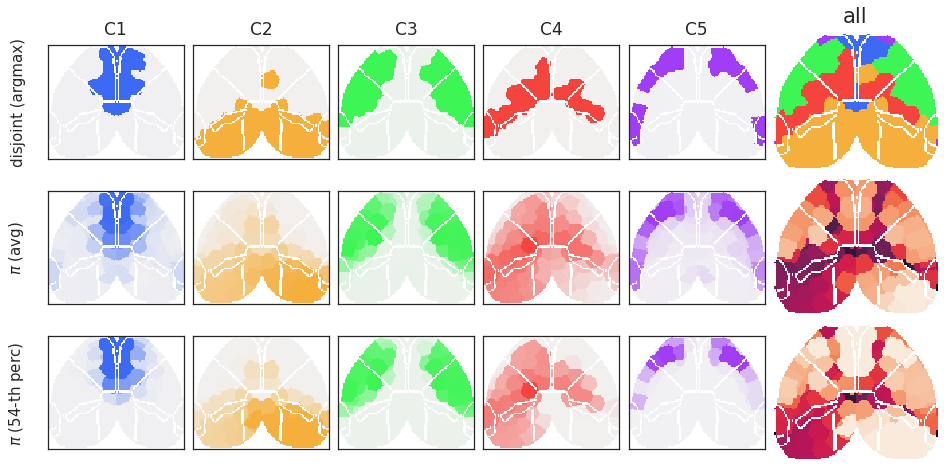

In [387]:
_ = svinet.plot_memberships_2d()

## Quartile buisiness

In [388]:
qs = [0.25, 0.50, 0.75]
dict_list = []
for name, run in tqdm(svinet.get_result_dict().items()):
    pi = np.round(run['pi'], decimals=2)
    ent = sp_stats.entropy(pi) / np.log(svinet.num_k)
    
    ent_qs = [np.quantile(ent, q) for q in qs]
    labels_ent = np.array(['Q1-ent'] * len(ent))
    labels_ent[np.logical_and(ent_qs[0] < ent, ent <= ent_qs[1])] = 'Q2-ent'
    labels_ent[np.logical_and(ent_qs[1] < ent, ent <= ent_qs[2])] = 'Q3-ent'
    labels_ent[ent_qs[2] < ent] = 'Q4-ent'

    cent_df = svinet.centralities[p]
    deg = cent_df.loc[cent_df.measure == 'degree_w', 'centrality'].values
    
    deg_qs = [np.quantile(deg, q) for q in qs]
    labels_deg = np.array(['Q1-deg'] * len(deg))
    labels_deg[np.logical_and(deg_qs[0] < deg, deg <= deg_qs[1])] = 'Q2-deg'
    labels_deg[np.logical_and(deg_qs[1] < deg, deg <= deg_qs[2])] = 'Q3-deg'
    labels_deg[deg_qs[2] < deg] = 'Q4-deg'

    data_dict = {
        'run': ['-'.join(name.split('-')[:-1])] * len(ent),
        'p': [int(name.split('-')[-1][1:])] * len(ent),
        'oc_idx': [i + 1 for i in np.argmax(pi, axis=0)],
        'node': range(len(ent)),
        'deg_cat': labels_deg,
        'ent_cat': labels_ent,
        'deg': deg,
        'ent': ent,
    }
    dict_list.append(data_dict)
df = pd.DataFrame(merge_dicts(dict_list))

  0%|          | 0/34870 [00:00<?, ?it/s]

In [389]:
deg_cat = sorted(df.deg_cat.unique())
ent_cat = sorted(df.ent_cat.unique())
oc_idx_cat = sorted(df.oc_idx.unique())

dict_list = []
for node in df.node.unique():
    for p in df.p.unique():
        _df = df.loc[
            (df.node == node) &
            (df.p == p)
        ]
        ctr_deg = collections.Counter(_df.loc[:, 'deg_cat'])
        ctr_ent = collections.Counter(_df.loc[:, 'ent_cat'])
        ctr_oc_idx = collections.Counter(_df.loc[:, 'oc_idx'])
        _iter = zip(
            ['deg', 'ent', 'oc_idx'],
            [deg_cat, ent_cat, oc_idx_cat],
            [ctr_deg, ctr_ent, ctr_oc_idx],
        )
        for _lbl, _cat, _ctr in _iter:
            x = {
                cat: _ctr.get(cat, 0) / len(_df) * 100
                for cat in _cat
            }
            data_dict = {
                'p': [p] * len(x),
                'node': [node] * len(x),
                'lbl': [_lbl] * len(x),
                'cat': x.keys(),
                'value': x.values(),
            }
            dict_list.append(data_dict)
df_count = pd.DataFrame(merge_dicts(dict_list))

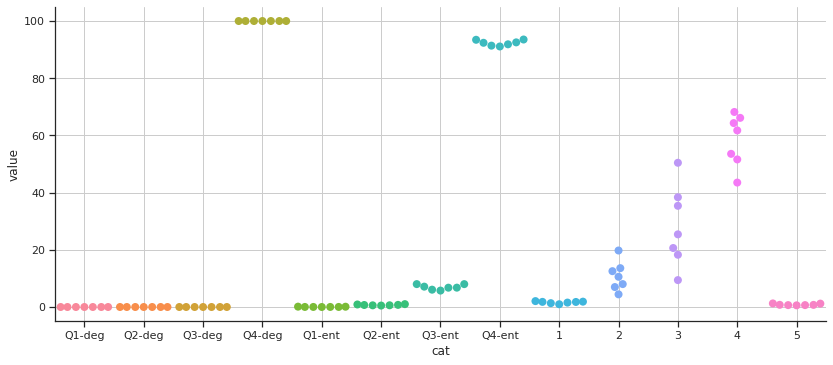

In [390]:
node = 29

sns.set_theme(style='ticks')
fg = sns.catplot(
    data=df_count.loc[df_count.node == node],
    x='cat',
    y='value',
    kind='swarm',
    aspect=2.3,
    s=8,
)
fg.ax.grid()

In [391]:
_df = df_count.loc[df_count.cat == 'Q4-ent']
_df = _df.groupby('node').mean()
_df.loc[:, 'value'].argsort().values[::-1]

array([ 16,   9,  20,   4,  29,  25,  88,  27,  98, 108, 112,  40,  19,
        85,  45,  41, 117,  94, 100,  10,  73,  48,  31,  89,  24,  43,
        79,  39,   1,  78, 133,  37, 107,  46,  42,  72,   5,  76,  38,
        74,  93,  53,  81, 122, 103, 115,  64,  51, 135,  32, 111, 137,
        70,  55,  14,   3,  80,  23,  58, 105,  47, 121, 119,  61,  54,
        69,   0,  99, 125,  83, 110,  18,  26,  65,  11,  59, 116,  86,
        12, 106,  96,  90, 114,  30,  49, 113,  34,  57,  17,  62,  87,
        91,  36,  97,   2,  63,  21, 109,  60,  66, 127, 102,  44, 134,
       118,  22, 123,  28,  71,   7,  92, 104, 101, 120,  35,  95,  67,
       124,  77,  84,   6, 130,  13,  82,  15,  75,  50,  68,   8,  52,
       136, 132, 128,  33, 131, 126, 129,  56])

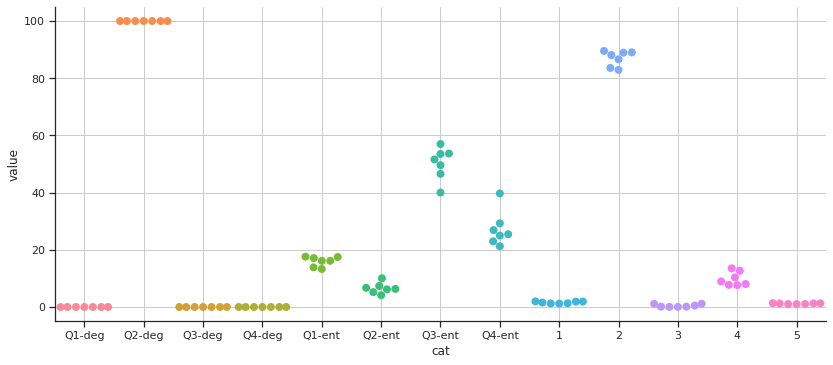

In [392]:
node = 122

sns.set_theme(style='ticks')
fg = sns.catplot(
    data=df_count.loc[df_count.node == node],
    x='cat',
    y='value',
    kind='swarm',
    aspect=2.3,
    s=8,
)
fg.ax.grid()

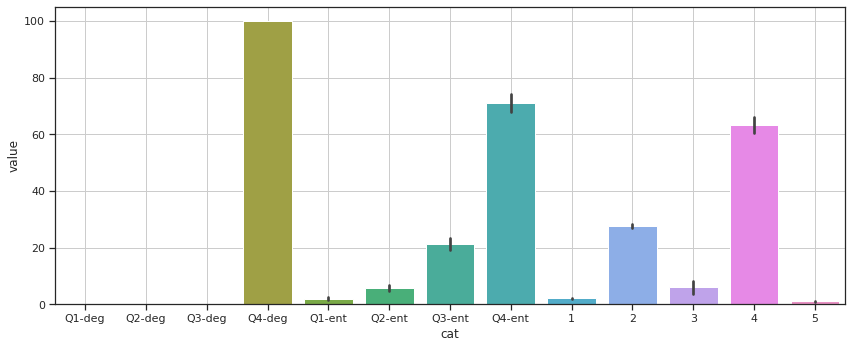

In [393]:
node = 45

fig, ax = create_figure(1, 1, (12, 5), 'ticks')
sns.barplot(
    data=df_count.loc[df_count.node == node],
    x='cat',
    y='value',
    ax=ax,
)
ax.grid()

## Median buisiness

In [394]:
dict_list = []
for name, run in tqdm(svinet.get_result_dict().items()):
    pi = np.round(run['pi'], decimals=2)
    ent = sp_stats.entropy(pi) / np.log(svinet.num_k)
    
    labels_ent = np.array(['L-ent'] * len(ent))
    labels_ent[ent > np.median(ent)] = 'H-ent'

    cent_df = svinet.centralities[p]
    deg = cent_df.loc[cent_df.measure == 'degree_w', 'centrality'].values
    
    labels_deg = np.array(['L-deg'] * len(ent))
    labels_deg[deg > np.median(deg)] = 'H-deg'

    data_dict = {
        'run': ['-'.join(name.split('-')[:-1])] * len(ent),
        'p': [int(name.split('-')[-1][1:])] * len(ent),
        'oc_idx': [i + 1 for i in np.argmax(pi, axis=0)],
        'node': range(len(ent)),
        'deg_cat': labels_deg,
        'ent_cat': labels_ent,
        'deg': deg,
        'ent': ent,
    }
    dict_list.append(data_dict)
df = pd.DataFrame(merge_dicts(dict_list))

  0%|          | 0/34870 [00:00<?, ?it/s]

In [395]:
deg_cat = sorted(df.deg_cat.unique())
ent_cat = sorted(df.ent_cat.unique())
oc_idx_cat = sorted(df.oc_idx.unique())

dict_list = []
for node in df.node.unique():
    for p in df.p.unique():
        _df = df.loc[
            (df.node == node) &
            (df.p == p)
        ]
        ctr_deg = collections.Counter(_df.loc[:, 'deg_cat'])
        ctr_ent = collections.Counter(_df.loc[:, 'ent_cat'])
        ctr_oc_idx = collections.Counter(_df.loc[:, 'oc_idx'])
        _iter = zip(
            ['deg', 'ent', 'oc_idx'],
            [deg_cat, ent_cat, oc_idx_cat],
            [ctr_deg, ctr_ent, ctr_oc_idx],
        )
        for _lbl, _cat, _ctr in _iter:
            x = {
                cat: _ctr.get(cat, 0) / len(_df) * 100
                for cat in _cat
            }
            data_dict = {
                'p': [p] * len(x),
                'node': [node] * len(x),
                'lbl': [_lbl] * len(x),
                'cat': x.keys(),
                'value': x.values(),
            }
            dict_list.append(data_dict)
df_count = pd.DataFrame(merge_dicts(dict_list))

In [409]:
_df = df_count.loc[df_count.cat == 'H-ent']
_df = _df.groupby('node').mean()
nodes_order = _df.loc[:, 'value'].argsort().values
nodes_order

array([ 56, 136, 132, 131, 129, 128,  52, 126,  50,  75,  82,   8,  13,
        68, 130,  67,  77,  84,  33,  71,  66,   6,   2, 120, 124,  15,
        21, 127,  28, 134,  65,  90, 123,  30,  36, 118,  35,  97, 114,
         7, 119, 101,  34,  22,  17, 106,  95,  92, 125, 104,  99,  44,
         0, 116, 109,  91,  86,  64, 135,  70, 137, 105, 102,  96,   3,
       113,  26,  12,  49,  54,  69, 121, 115, 110,  87,  93, 103,  18,
        76,  60,  72,  58,  83,  42,  46, 111,  63,  61, 133,  57,  11,
        81,  62,  23,  79,  59,  14,  47,  55,  80,  53,  32,  39,   1,
        37,  38,  51,  24, 122, 107,  43,  31,  73,  74,   5,  94,  78,
        48,  10, 100, 108, 112,  85,  45,  89, 117,  19,  98,  25,  41,
        40,  88,  27,   4,  29,  20,  16,   9])

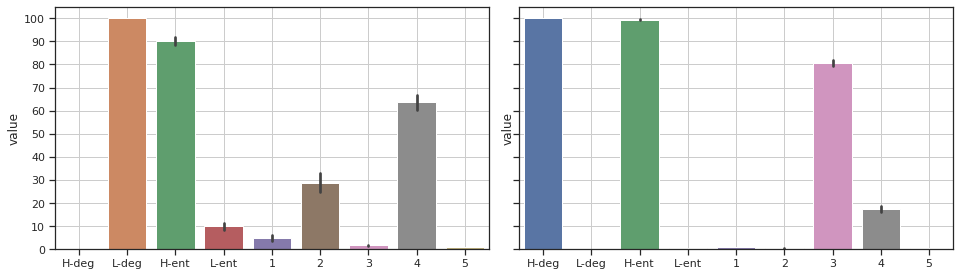

In [411]:
fig, axes = create_figure(1, 2, (13.5, 4), 'ticks', 'all', 'all')
for ax, node in zip(axes, [108, 20]):
    sns.barplot(
        data=df_count.loc[df_count.node == node],
        x='cat',
        y='value',
        ax=ax,
    )
    ax.set(xlabel='', yticks=range(0, 101, 10))
    ax.grid()

In [412]:
nodes_pacel_space = [
    int(svinet.n2l[n].split('-')[-1])
    for n in nodes_order
    if '315' in svinet.n2l[n]
]
masks = {
    node: mice.parcel.results['eroded_masks'][node]
    for node in nodes_pacel_space
}
_ = parcel2html(
    masks=masks,
    cmap='seismic',
    save_dir=extras_dir,
    save_name='ent_low_to_high',
    alpha=0.3,
    alpha_base=0.0,
)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/ent_low_to_high_k128.html

In [413]:
low_deg_order = []
for node in nodes_order:
    _df = df_count.loc[df_count.node == node]
    if _df.loc[_df.cat == 'L-deg', 'value'].mean() >= 90:
        low_deg_order.append(node)
low_deg_order

[
    56,
    136,
    132,
    131,
    129,
    128,
    52,
    126,
    50,
    75,
    82,
    8,
    13,
    68,
    67,
    77,
    84,
    33,
    71,
    66,
    6,
    2,
    120,
    15,
    21,
    134,
    65,
    90,
    30,
    36,
    118,
    114,
    7,
    119,
    34,
    22,
    106,
    125,
    99,
    44,
    0,
    64,
    135,
    70,
    137,
    105,
    3,
    113,
    12,
    69,
    121,
    115,
    93,
    103,
    76,
    72,
    42,
    46,
    111,
    133,
    81,
    79,
    1,
    37,
    24,
    122,
    108,
    112,
    117
]

In [414]:
nodes_pacel_space = [
    int(svinet.n2l[n].split('-')[-1])
    for n in low_deg_order
    if '315' in svinet.n2l[n]
]
masks = {
    node: mice.parcel.results['eroded_masks'][node]
    for node in nodes_pacel_space
}
_ = parcel2html(
    masks=masks,
    cmap='Reds',
    save_dir=extras_dir,
    save_name='ent_low_to_high_low_deg_only',
    alpha=0.3,
    alpha_base=0.0,
)

Scene saved at 
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/ent_low_to_high_low_deg_only_k59.html

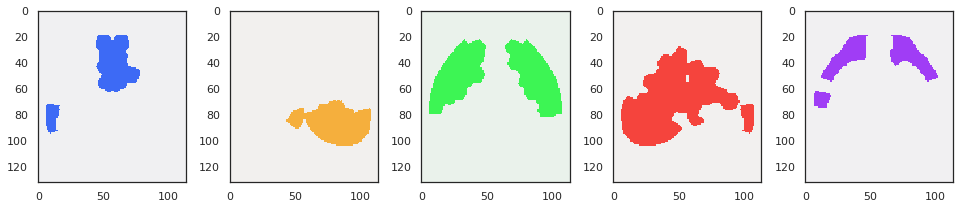

In [401]:
masks = svinet.masks_from_pi(run['pi'], disjoint=True, cortex_only=True)

fig, axes = create_figure(1, svinet.num_k, (13.5, 3.5))
for idx in range(1, svinet.num_k + 1):
    x = project_vol_2d(masks[idx], mice.allen['dims_flat'], mode='max_proj')
    axes[idx-1].imshow(x, cmap=svinet.cmaps[idx])
    

In [15]:
len(svinet.get_result_dict())

34658

current expt: 'p-1'

[PROGRESS] loading 'k6-cosine-linksampling-(2021_07_20)' from
'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/b
old_spearman_sub-SLC_n128/p-1'

  0%|          | 0/100 [00:00<?, ?it/s]

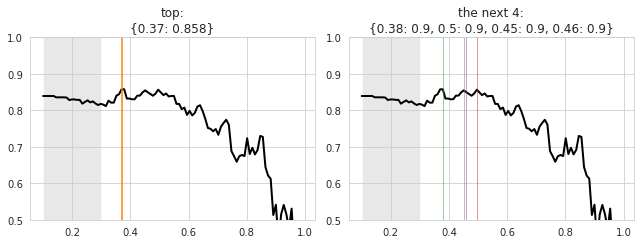

[PROGRESS] process results: done

[PROGRESS] 50 results loaded

00 - 00:00:23  (dd - hh:mm:ss)

In [3]:
start = time()
svinet = SVINET(
    mice=mice,
    num_k=6,
    perc=-1,
    key=key,
    mode=mode,
    metric=metric,
    match_metric=match_metric,
    verbose=True,
).load_results(full_process=True)
convert_time(time()-start)

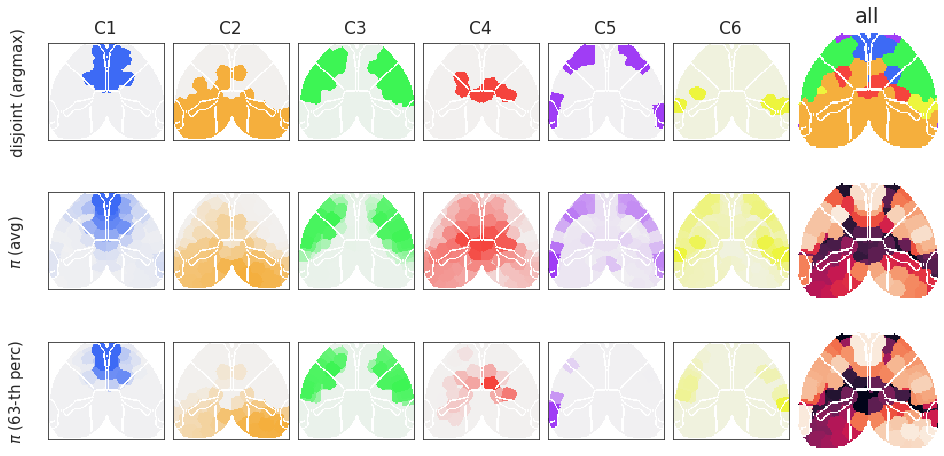

In [4]:
_ = svinet.plot_memberships_2d()

In [8]:
svinet.perf_df

,oc_idx,p,run,metric,score
0,1,35,n138-k6-mmsb-seed1-linksampling,cosine,0.065448
1,2,35,n138-k6-mmsb-seed1-linksampling,cosine,0.872947
2,3,35,n138-k6-mmsb-seed1-linksampling,cosine,0.963539
3,4,35,n138-k6-mmsb-seed1-linksampling,cosine,0.695601
4,5,35,n138-k6-mmsb-seed1-linksampling,cosine,0.786379
...,...,...,...,...,...
512675,6,17,n138-k6-mmsb-seed1000-linksampling,jensenshannon,0.466115
512676,all,17,n138-k6-mmsb-seed1000-linksampling,cosine,0.753825
512677,all,17,n138-k6-mmsb-seed1000-linksampling,correlation,0.675412
512678,all,17,n138-k6-mmsb-seed1000-linksampling,braycurtis,0.585393


In [9]:
df = svinet.perf_df
_df = df.loc[df.oc_idx == 'all']

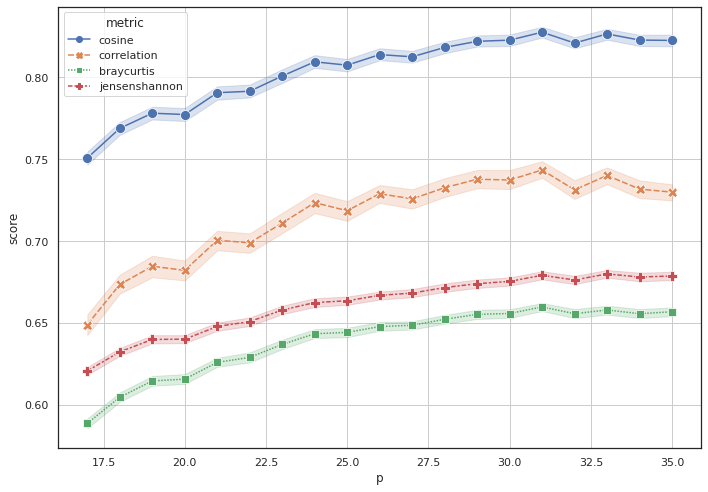

In [10]:
fig, ax = create_figure(1, 1, (10, 7))
sns.lineplot(
    data=_df,
    x='p',
    y='score',
    hue='metric',
    style='metric',
    markers=True,
    markersize=10,
    ax=ax,
)
ax.grid(axis='both')